<a href="https://colab.research.google.com/github/ctruciosm/BasicStats/blob/main/ACP_ME731.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab ME731: Análise de Componentes Principais
By Carlos Trucíos

## Primeiros Passos

In [ ]:
# Instalamos os pacotes
install.packages("dplyr")
install.packages("FactoMineR")
install.packages("factoextra")
install.packages("POET")

In [ ]:
# Carregamos os pacotes
library(dplyr)
library(FactoMineR)
library(factoextra)
library(POET)

In [3]:
# Importamos os dados
swiss_notes <- read.csv("https://raw.githubusercontent.com/ctruciosm/ctruciosm.github.io/master/datasets/swiss_bank_notes.csv")

In [4]:
# Renomeamos as variáveis convenientemente
swiss_notes <-  swiss_notes %>% 
  rename("comprimento" = "X1", 
         "alt_esq" = "X2", 
         "alt_dir" = "X3",
         "borda_inf" = "X4", 
         "borda_sup" = "X5", 
         "diagonal" = "X6") %>% 
  mutate(Y = factor(Y))   # 0:  original, 1: Falsificado
  glimpse(swiss_notes)

Rows: 200
Columns: 7
$ comprimento <dbl> 214.8, 214.6, 214.8, 214.8, 215.0, 215.7, 215.5, 214.5, 21…
$ alt_esq     <dbl> 131.0, 129.7, 129.7, 129.7, 129.6, 130.8, 129.5, 129.6, 12…
$ alt_dir     <dbl> 131.1, 129.7, 129.7, 129.6, 129.7, 130.5, 129.7, 129.2, 12…
$ borda_inf   <dbl> 9.0, 8.1, 8.7, 7.5, 10.4, 9.0, 7.9, 7.2, 8.2, 9.2, 7.9, 7.…
$ borda_sup   <dbl> 9.7, 9.5, 9.6, 10.4, 7.7, 10.1, 9.6, 10.7, 11.0, 10.0, 11.…
$ diagonal    <dbl> 141.0, 141.7, 142.2, 142.0, 141.8, 141.4, 141.6, 141.7, 14…
$ Y           <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…


In [5]:
# Selecionamos apenas as variáveis numéricas
swiss_notes_4pca <- swiss_notes  %>% select_if(is.numeric)

In [6]:
# Calculamos algumas estatísticas descritivas
summary(swiss_notes_4pca)
apply(swiss_notes_4pca, 2, sd)

  comprimento       alt_esq         alt_dir        borda_inf     
 Min.   :213.8   Min.   :129.0   Min.   :129.0   Min.   : 7.200  
 1st Qu.:214.6   1st Qu.:129.9   1st Qu.:129.7   1st Qu.: 8.200  
 Median :214.9   Median :130.2   Median :130.0   Median : 9.100  
 Mean   :214.9   Mean   :130.1   Mean   :130.0   Mean   : 9.418  
 3rd Qu.:215.1   3rd Qu.:130.4   3rd Qu.:130.2   3rd Qu.:10.600  
 Max.   :216.3   Max.   :131.0   Max.   :131.1   Max.   :12.700  
   borda_sup        diagonal    
 Min.   : 7.70   Min.   :137.8  
 1st Qu.:10.10   1st Qu.:139.5  
 Median :10.60   Median :140.4  
 Mean   :10.65   Mean   :140.5  
 3rd Qu.:11.20   3rd Qu.:141.5  
 Max.   :12.30   Max.   :142.4  

comprimento     alt_esq     alt_dir   borda_inf   borda_sup    diagonal 
  0.3765541   0.3610255   0.4040719   1.4446031   0.8029467   1.1522657

## ACP vía matriz de covariância ou matriz de correlação?


In [7]:
pca_cor <- PCA(swiss_notes_4pca, ncp = ncol(swiss_notes_4pca)) # o default é transformar os dados para terem variância 1

In [8]:
# Extrair autovalores do ACP vía matriz de correlação
get_eig(pca_cor)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.9455582,49.092637,49.09264
Dim.2,1.2780838,21.301396,70.39403
Dim.3,0.8690326,14.483876,84.87791
Dim.4,0.4497687,7.496145,92.37405
Dim.5,0.2686769,4.477948,96.85200
Dim.6,0.1888799,3.147998,100.00000


## Número de Componentes

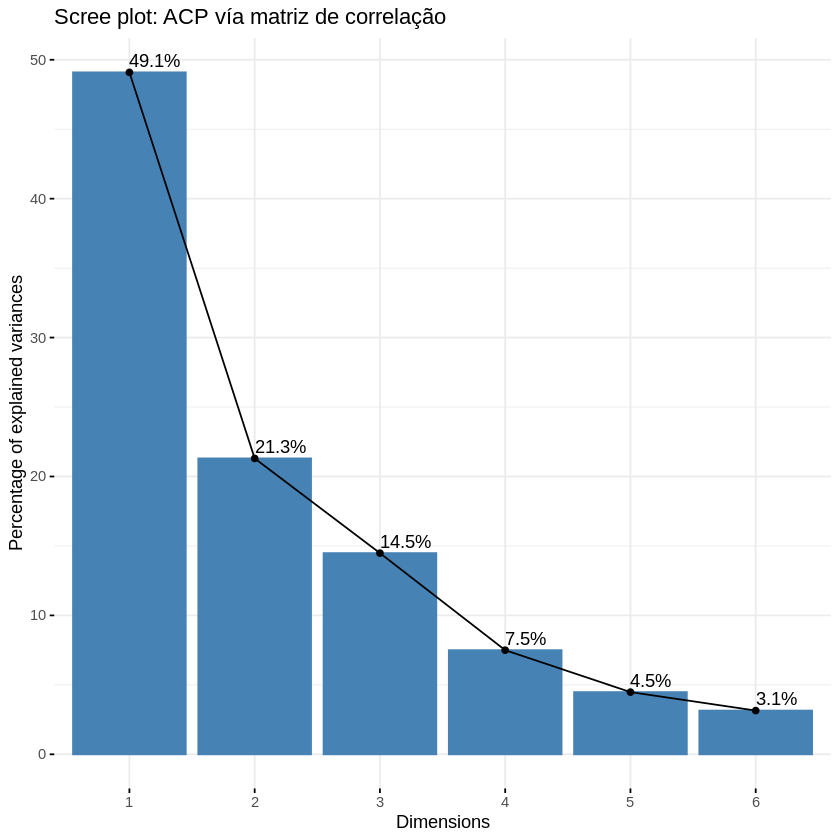

In [9]:
## Scree plot
fviz_screeplot(pca_cor, addlabels = TRUE, main = "Scree plot: ACP vía matriz de correlação")

In [10]:
# Critério de Kaisser
autovalores <- get_eigenvalue(pca_cor)[,"eigenvalue"]
autovalores
mean(autovalores)

Dim.1     Dim.2     Dim.3     Dim.4     Dim.5     Dim.6 
2.9455582 1.2780838 0.8690326 0.4497687 0.2686769 0.1888799

[1] 1

In [11]:
# Critério da razão de autovalores
autovalores[1:(length(autovalores) - 1)] / autovalores[2:length(autovalores)]

Dim.1    Dim.2    Dim.3    Dim.4    Dim.5 
2.304668 1.470697 1.932177 1.674013 1.422475

In [12]:
## Critérios de Bai and Ng (2002) e Hallin e Liska (2007)
POETKhat(t(scale(swiss_notes_4pca, scale = TRUE)))

0.2925896,0.5929631,0.8940182,1.195775,1.497835,1.800029,2.10254,2.405051,2.707562,3.010074
0.2976638,0.6031116,0.9092410,1.216072,1.523206,1.830475,2.13806,2.445645,2.753231,3.060816


### Observação:

1. Diferentes critérios não necessáriamente sugerirão o mesmo número de componentes a serem retidas.
2. Na prática, é comúm utilizar vários critérios e reter tantos componentes quando a maioria dos critérios sugerir.
3. **Pessoalmente** prefiro utilizar os critérios de Bai e Ng (2002) e Hallin e Liska (2007).

# Interpretação das Componentes

In [13]:
# Observamos os pesos (autovetores):
## os pesos falam a respeito de quais variáveis estão sendo representadas por cada componente
P_cor = pca_cor$svd$V
P_cor

-0.006987029,0.81549497,-0.01768066,-0.5746173,0.0587961,-0.03105698
0.467758161,0.34196711,0.10338286,0.3949225,-0.6394961,0.29774768
0.486678705,0.25245860,0.12347472,0.4302783,0.6140972,-0.34915294
0.406758327,-0.26622878,0.58353831,-0.4036735,0.2154756,0.46235361
0.367891118,-0.09148667,-0.78757147,-0.1102267,0.2198494,0.41896754
-0.493458317,0.27394074,0.11387536,0.3919305,0.3401601,0.63179849


### Observação: 
os autovetores são também chamados de "pesos" ou "cargas" (devido ao papel que desempenham na construção das componentes)

### Lembrete:

- Pela decomposição SVD $X = U D V'$,
- Então $X V = U D \underbrace{V'V}_{\textbf{I}} = UD\quad$     (pois $V$ é ortonormal),
- Por outro lado, $X'X = VDU'UDV' = VD^2V',$
- Ou seja, $V$ é a matriz de autovetores, $D^2$ a matriz diagonal de autovalores e $UD$ são as componentes principais.

In [14]:
# Olhamos para a correlação das variáveis com a(s) componente(s) principal(is)
pca_cor$var$cor

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
comprimento,-0.01199158,0.9219364,-0.01648225,-0.38536590,0.0304764,-0.01349746
alt_esq,0.80279596,0.3866019,0.09637548,0.26485400,-0.3314768,0.12940207
alt_dir,0.83526859,0.2854104,0.11510550,0.28856524,0.3183114,-0.15174296
borda_inf,0.69810421,-0.3009779,0.54398559,-0.27072283,0.1116898,0.20094033
borda_sup,0.63139786,-0.1034278,-0.73418921,-0.07392333,0.1139569,0.18208461
diagonal,-0.84690418,0.3096965,0.10615680,0.26284740,0.1763188,0.27458160


In [15]:
# Calculando as correlações de forma alternativa
z <- pca_cor$ind$coord[,1]  #coord = os scores das componentes principais
cor(cbind(z,swiss_notes_4pca))[-1,]

,z,comprimento,alt_esq,alt_dir,borda_inf,borda_sup,diagonal
comprimento,-0.01199158,1.00000000,0.2312926,0.1517628,-0.1898009,-0.06132141,0.1943015
alt_esq,0.80279596,0.23129257,1.0000000,0.7432628,0.4137810,0.36234960,-0.5032290
alt_dir,0.83526859,0.15176280,0.7432628,1.0000000,0.4867577,0.40067021,-0.5164755
borda_inf,0.69810421,-0.18980092,0.4137810,0.4867577,1.0000000,0.14185134,-0.6229827
borda_sup,0.63139786,-0.06132141,0.3623496,0.4006702,0.1418513,1.00000000,-0.5940446
diagonal,-0.84690418,0.19430146,-0.5032290,-0.5164755,-0.6229827,-0.59404464,1.0000000


Mas $$Cor(x_j, z_i) = \sqrt{\lambda_i}a_{ij}$$

In [16]:
## Outra forma de calcular
sqrt(autovalores[1])*P_cor[,1]

[1] -0.01199158  0.80279596  0.83526859  0.69810421  0.63139786 -0.84690418

In [17]:
# As coordenadas dos individuos são os scores das componentes principais mas e 
# as coordenadas das variáveis?
# são os autovetores multiplicados pela raiz quadrada seu autovalor associado 
# (ou seja, no caso de variáveis padronizadas, são iguais às correlações!)
pca_cor$var$coord

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
comprimento,-0.01199158,0.9219364,-0.01648225,-0.38536590,0.0304764,-0.01349746
alt_esq,0.80279596,0.3866019,0.09637548,0.26485400,-0.3314768,0.12940207
alt_dir,0.83526859,0.2854104,0.11510550,0.28856524,0.3183114,-0.15174296
borda_inf,0.69810421,-0.3009779,0.54398559,-0.27072283,0.1116898,0.20094033
borda_sup,0.63139786,-0.1034278,-0.73418921,-0.07392333,0.1139569,0.18208461
diagonal,-0.84690418,0.3096965,0.10615680,0.26284740,0.1763188,0.27458160


In [18]:
pca_cov <- PCA(swiss_notes_4pca, ncp = ncol(swiss_notes_4pca), scale.unit = FALSE)

In [19]:
pca_cov$var$cor
pca_cov$var$coord
autovalores_cov <- get_eigenvalue(pca_cov)[,"eigenvalue"]
pca_cov$svd$V[,1]*sqrt(autovalores_cov[1])

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
comprimento,-0.2013605,-0.02751049,0.42754733,0.65812392,-0.58340637,-0.049094978
alt_esq,0.5381321,-0.19142371,0.35389103,0.55660629,0.28040914,0.400115094
alt_dir,0.5966697,-0.15866725,0.42091691,0.45349363,0.38624450,-0.294614363
borda_inf,0.9212294,0.37702092,0.07446028,-0.05683999,-0.02020046,0.002898297
borda_sup,0.4352554,-0.79421772,0.34205493,-0.24764888,-0.03704650,0.008181424
diagonal,-0.8702320,0.41010930,0.25337722,-0.09895962,0.02139651,0.007470889


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
comprimento,-0.07563332,-0.01033325,0.1605917,0.24719891,-0.21913414,-0.018440638
alt_esq,0.19379313,-0.06893586,0.1274439,0.20044609,0.10098146,0.144090190
alt_dir,0.24049398,-0.06395250,0.1696550,0.18278536,0.15567989,-0.118747406
borda_inf,1.32747969,0.54328227,0.1072963,-0.08190569,-0.02910860,0.004176409
borda_sup,0.34861209,-0.63611820,0.2739644,-0.19835110,-0.02967191,0.006552804
diagonal,-1.00022852,0.47137202,0.2912271,-0.11374236,0.02459276,0.008586901


[1] -0.07563332  0.19379313  0.24049398  1.32747969  0.34861209 -1.00022852

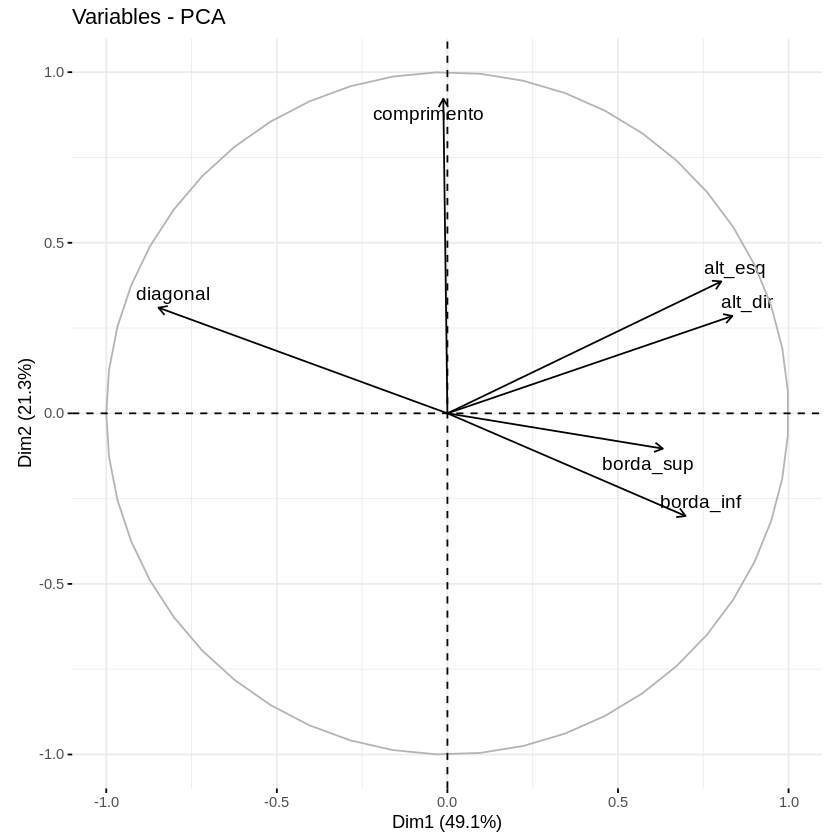

In [20]:
# Outras alternativas para visualizar a correlação das variáveis com as componentes
# (nuvem de variáveis)
fviz_pca_var(pca_cor, repel = TRUE)

O gráfico acima representa a correlação das variáveis com os as 2 componentes principais. No caso de variáveis padronizadas, o tamanho do vetor nos diz a proporção da variância da variável que é explicada por ambas as componentes (para verificar, basta calcular $Var(x_1) = Var((1,0,0,0) \times X) = (1, 0, 0, 0)\Sigma (1, 0, 0, 0)' = (1, 0, 0, 0)P\Lambda P' (1, 0, 0, 0)' = a_{i1}^1\lambda_1 + \cdots + a_{ip}^1\lambda_p = 1$.

- `diagonal` e a primeira componente estão (fortemente) negativamente correlacionadas.
- `alt_esq`, `alt_dir`, `borda_sup` e `borda_inf` estão positivamente correlacionadas com a componente 1.
- `alt_esq` e `alt_dir` tem uma correlação positiva com a componente 2.
- `borda_sup` e `borda_inf` tem uma correlação negativa com a componente 2.
- `comprimento`e a componente 1 são não correlacionadas.
- `comprimento`e a componente 2 são positivamente correlacionadas.
- Todas as outras variáveis tem uma correlação inferior a 0.5 com a componene 2.
- `alt_esq` e `alt_dir`  estão fortemente correlacionais (positivamente).


### Observação: 
Se quisermos saber a correlação entre duas variveis olhando para o gráfico acima, basta reparar no angulo $\theta_{ij}$ formado pelos vetores representando as variáveis de interesse, com isso, utilizamos o seguinte resultado:
$$Cor(x_i, x_j) = cos(\theta_{ij}),$$

- angulo entre 0 e 90 $\rightarrow$ correlação positiva (enquanto menor o angulo, maior a correlação).
- angulo entre 90 e 180 $\rightarrow$ correlação negativa (enquanto maior o angulo, maior a correlação).


In [21]:
cor(swiss_notes_4pca)

,comprimento,alt_esq,alt_dir,borda_inf,borda_sup,diagonal
comprimento,1.00000000,0.2312926,0.1517628,-0.1898009,-0.06132141,0.1943015
alt_esq,0.23129257,1.0000000,0.7432628,0.4137810,0.36234960,-0.5032290
alt_dir,0.15176280,0.7432628,1.0000000,0.4867577,0.40067021,-0.5164755
borda_inf,-0.18980092,0.4137810,0.4867577,1.0000000,0.14185134,-0.6229827
borda_sup,-0.06132141,0.3623496,0.4006702,0.1418513,1.00000000,-0.5940446
diagonal,0.19430146,-0.5032290,-0.5164755,-0.6229827,-0.59404464,1.0000000


A correlação entre `borda_inf`e `borda_sup` é baixa mas o angulo entre os vetores correspondentes é pequeno!? Qual o motivo disso?

- a variabilidade dessas variáveis não foi tão bem capturada nessas componentes o que pode nos levar a confusão entre a correlação das variáveis originais.
- as componentes 1 e 3 parecem explicar melhor essas variáveis, vejamos o que acontece.

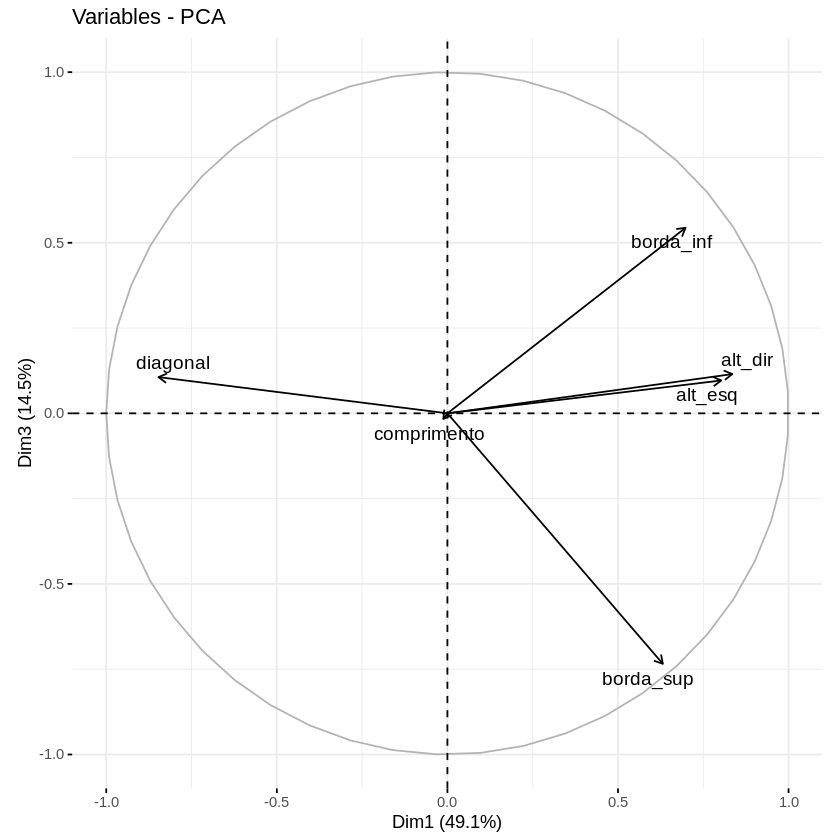

In [22]:
fviz_pca_var(pca_cor, repel = TRUE, axes = c(1, 3))

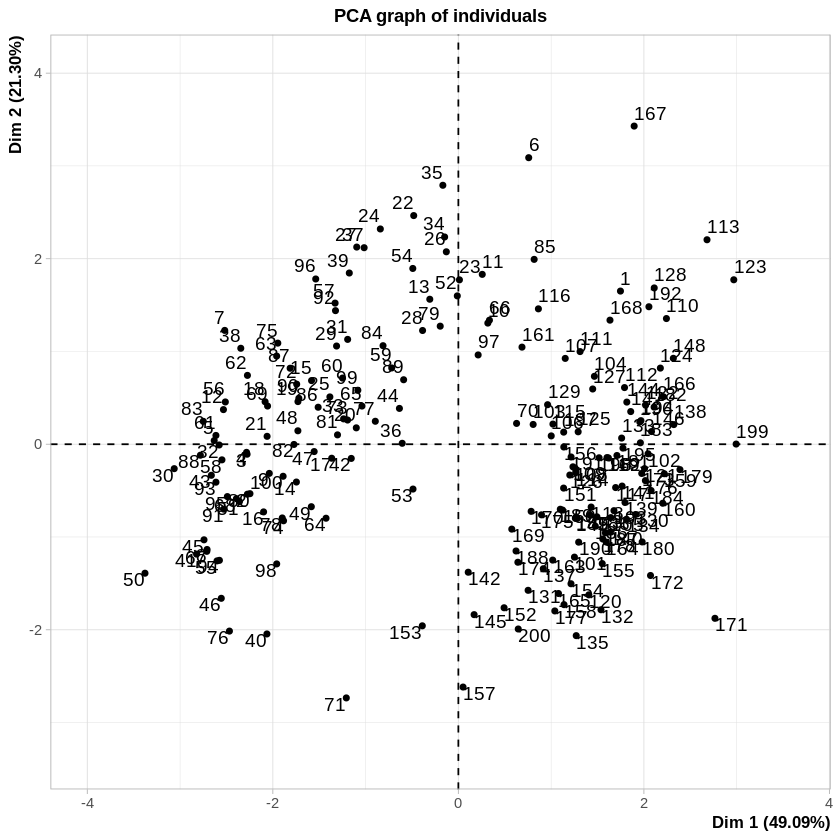

In [23]:
plot(pca_cor)

- No gráfico acima, os pontos são a projeção dos $x_i$s nas duas primeiras componentes principais. 
- Ele permite identificar grupos (se existirem), possíveis outliers, bem como observações semelhantes.
- Podemos "misturar" os dois gráficos anteriores e teremos o famoso "biplot"

In [24]:
y = scale(swiss_notes_4pca)
sum((y[113,]-y[123,])^2) # Distancia euclideana

[1] 4.231128

In [25]:
sum((y[71,]-y[167,])^2) # Distancia euclideana

[1] 61.35313

In [26]:
sum((y[6,]-y[167,])^2) # Distancia euclideana

[1] 8.247516

In [27]:
sum((y[53,]-y[153,])^2) # Distancia euclideana

[1] 9.482099

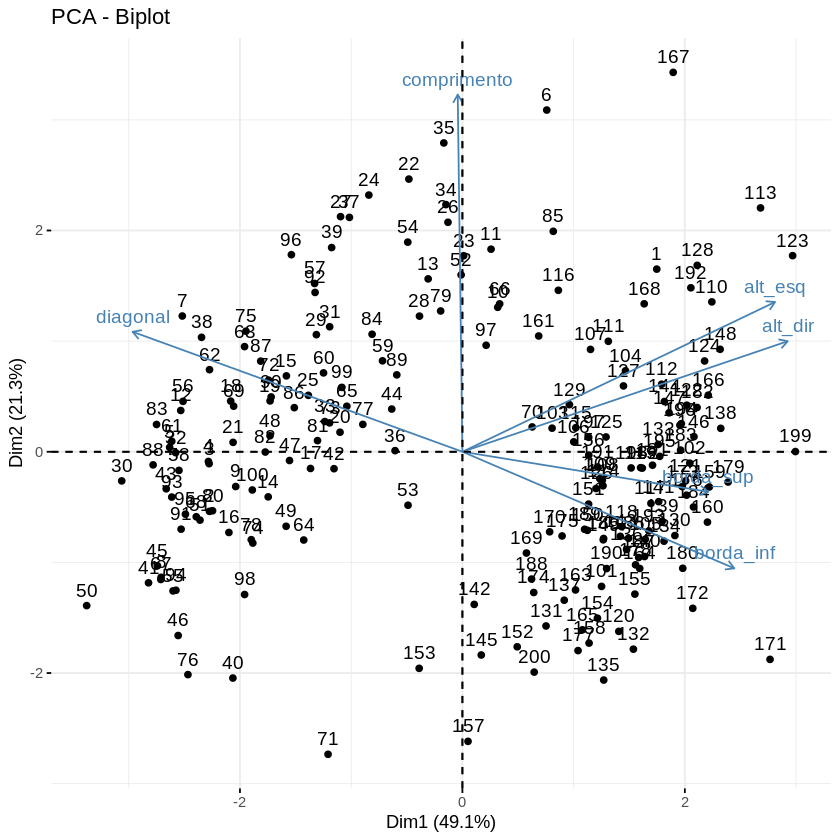

In [28]:
fviz_pca_biplot(pca_cor)

## Contribuição das variáveis/observações

- Outliers tem uma influência na construção das componentes.
- Estamos interessados em saber quanto uma observação contribui na variabilidade total da componente (esperamos que não existe nenhuma observação isolada que tenha contribuido muito).
- Por outro lado, podemos também estar interessados em saber quanto uma variável contribuiu na variabilidade total da componente.


A varibilidade total da $j$-ésima componente é $\lambda_j$. Então, a contribuição da $i$-éssima observação sobre a $j$-éssima componente é calculada atraves de $$\dfrac{n^{-1}(OH_i^s)^2}{\lambda_j} \times 100$$

- $H_i^s$ é a projeção de $x_i$ no componente $s$ e $O$ é a média dos pontos projetados, $OH_i^s$ é um vetor (a distância da origem ao ponto projetado).

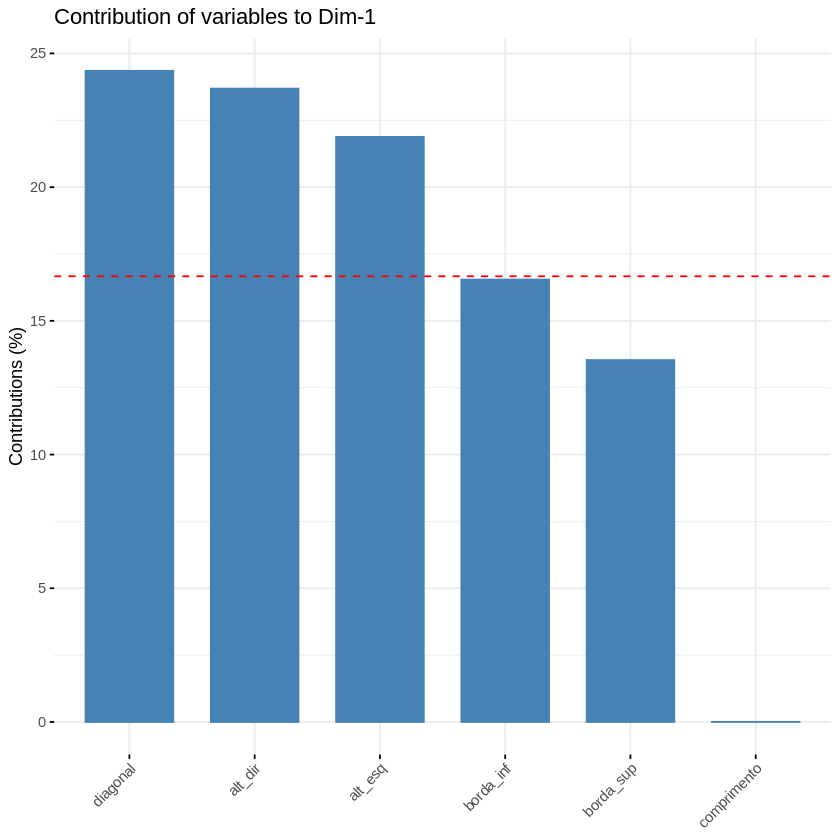

In [29]:
fviz_contrib(pca_cor, choice = "var", axes = 1, top = 6)

In [30]:
(pca_cor$var$cor[,1])^2/autovalores[1]*100

comprimento      alt_esq      alt_dir    borda_inf    borda_sup     diagonal 
 0.004881857 21.879769707 23.685616182 16.545233669 13.534387484 24.350111100

In [31]:
pca_cor$var$contrib

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6
comprimento,0.004881857,66.5032044,0.03126058,33.018501,0.3456982,0.09645361
alt_esq,21.879769707,11.6941503,1.06880152,15.596382,40.8955288,8.86536810
alt_dir,23.685616182,6.3735347,1.52460062,18.513938,37.7115322,12.19077782
borda_inf,16.545233669,7.0877765,34.05169589,16.295232,4.6429750,21.37708650
borda_sup,13.534387484,0.8369811,62.02688153,1.214993,4.8333766,17.55338028
diagonal,24.350111100,7.5043531,1.29675987,15.360953,11.5708892,39.91693370


In [32]:
sum(pca_cor$var$cor[,1]^2)
autovalores[1]

[1] 2.945558

Dim.1 
2.945558

In [33]:
mean(pca_cor$var$contrib[,1])

[1] 16.66667

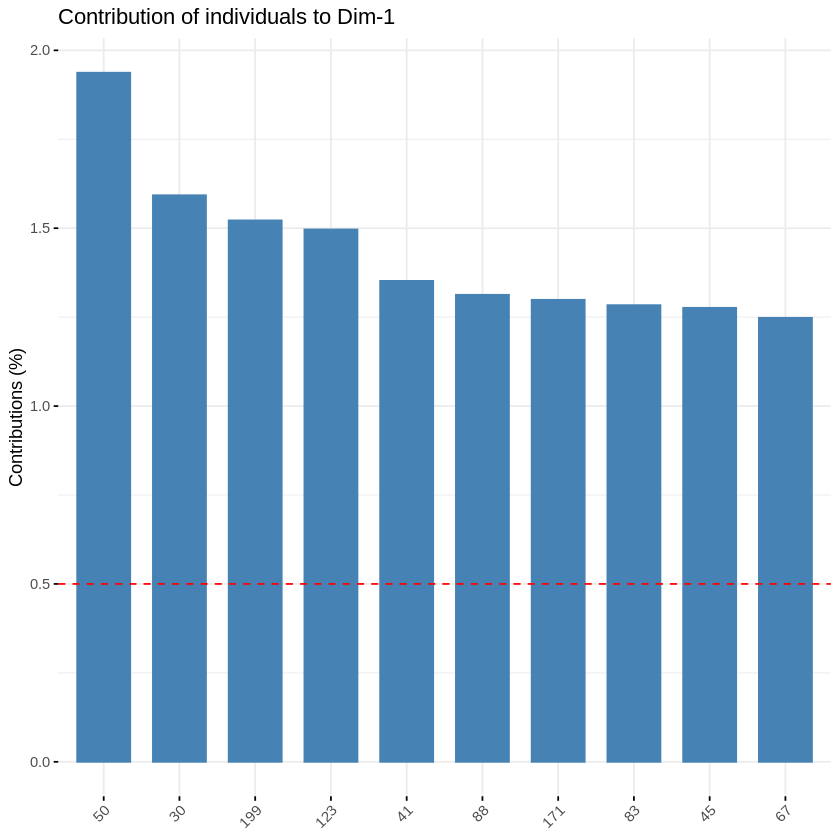

In [34]:
fviz_contrib(pca_cor, choice = "ind", axes = 1, top = 10)